# **Project Name**    -



##### **Project Type**    - EDA of Play Store App and User Review Data
##### **Contribution**    - R S Aravind


# **Project Summary -**

This project focuses on conducting Exploratory Data Analysis (EDA) on the Google Play Store application dataset to identify the key factors that influence app engagement, popularity, and long-term success in the Android ecosystem. With millions of apps competing for user attention, understanding what drives higher ratings, greater install counts, and user satisfaction has become essential. By examining attributes such as app category, price, reviews, content rating, app size, and update frequency, this study aims to uncover meaningful patterns and trends that can help developers and product strategists make data-driven decisions, optimize user experience, and remain competitive in the rapidly evolving mobile marketplace.

# **GitHub Link -**

https://github.com/aravindmarri10/google-play-store-eda

# **Problem Statement**


Although the Google Play Store hosts millions of applications, only a limited subset achieves high visibility, sustained engagement, and strong user approval. Developers often lack clarity on which factors most significantly impact user ratings, download growth, and overall app performance. Without these insights, businesses risk investing time and resources into features or strategies that may not resonate with users.

The objective of this project is to understand what factors drive app engagement and success, using installs, ratings, and user sentiment as key indicators.

#### **Define Your Business Objective?**

The business objective of this project is to derive actionable insights that can guide app developers, product managers, and marketing teams in optimizing their applications for improved market performance. Specifically, the objective is to:

* Identify which app characteristics (such as pricing model, category, size, and user reviews) significantly influence downloads, ratings, and user engagement.

* Understand user preferences and behaviors to support better product decisions.

* Provide strategic recommendations that help businesses enhance app visibility, improve user satisfaction, and achieve competitive advantage in the Google Play Store.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd

### Dataset Loading

In [2]:
# Load Dataset
df = pd.read_csv('data/Play Store Data.csv')
review_df = pd.read_csv('data/User Reviews.csv')

### Dataset First View

In [3]:
# Google play store Dataset First Look
df.head() # Shows the first 5 rows

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
# User review Dataset First Look
review_df.head() # Shows the first 5 rows

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [5]:
df.tail() # Shows the last 5 rows

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
df.shape #Shows the row and column count

(10841, 13)

### Dataset Information

In [7]:
# Dataset Info
df.info() # Shows data types and missing values

#Installs, Price, Size currently appear as object instead of numeric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [8]:
df.describe() #Summary stats for numeric columns

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [9]:
df.describe(include="all")

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Missing Values/Null Values

In [10]:
# Dataset Duplicate Value Count
missing_data = df.isnull().sum().sort_values(ascending=False)

missing_data

Rating            1474
Current Ver          8
Android Ver          3
Content Rating       1
Type                 1
Size                 0
Reviews              0
Category             0
App                  0
Price                0
Installs             0
Last Updated         0
Genres               0
dtype: int64

##Duplicate Values

In [11]:
# Dataset Duplicate Value Count
print(df.duplicated().sum())

483


In [12]:
print(df.duplicated('App').sum()) #same app different version

1181


### What did you know about your dataset?



*   The dataset contains 10,841 rows and 13 columns.
*   Installs, Price, Size, Reviews currently appear as object instead of numeric.
*   There are missing values in some columns including Rating, Current Ver, Content Rating, Android Ver, Type.
*   Rating column contains invalid values, with a maximum value of 19.
*   The most frequent Category = FAMILY, Type = Free, and Content Rating = Everyone, showing that most apps target a general audience and free market strategy.
*   The Rating column contains 1474 missing values.
*   Columns Current Ver, Android Ver , Content Rating ,and Type contain very few null values.
*   There are 483 duplicate rows.





## ***2. Understanding Your Variables***

In [13]:
# Dataset Columns
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
unique_counts = df.nunique().reset_index()
unique_counts.columns = ['Column', 'Unique_Values']
unique_counts


,Column,Unique_Values
0,App,9660
1,Category,34
2,Rating,40
3,Reviews,6002
4,Size,462
5,Installs,22
6,Type,3
7,Price,93
8,Content Rating,6
9,Genres,120


## 3. ***Data Wrangling***

### Data Wrangling Code

Convert incorrect data types

In [15]:
# Write your code to make your dataset analysis ready.
df_copy = df.copy()
df_copy.dtypes   #Check data type

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [16]:
# Convert Installs to numeric
df_copy['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [17]:
char_to_remove = [',','+']  # Removed character '+, ','
for item in char_to_remove:
  df_copy['Installs'] =df_copy['Installs'].str.replace(item,'')



In [18]:
df_copy['Installs'] = pd.to_numeric(df_copy['Installs'], errors='coerce') # convert the Installs into numeric value

In [19]:
# Convert Price to numeric
df_copy['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [20]:
df_copy['Price'] = df_copy['Price'].str.replace('$','')   # Removed character '+, ','

In [21]:
df_copy['Price'] = pd.to_numeric(df_copy['Price'], errors='coerce') # Convert the Price into numeric value

In [22]:
# Convert Size to numeric
df_copy['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [23]:
# This function converts the Size column values into kilobytes (KB).

def convert_size_to_kb(val):
  if val[-1] == 'M':
    return float(val[:-1]) * 1000

  if val[-1] == 'k':
        return float(val[:-1])

df_copy['Size'] = df_copy['Size'].apply(convert_size_to_kb)



In [24]:
#Check how many size with 'Varies with device' value.
df_copy[df_copy['Size'] == 'Varies with device']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [25]:
# Convert Reviews into numeric

df_copy['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'],
      shape=(6002,), dtype=object)

In [26]:
# Converted the Reviews into numeric value

df_copy['Reviews'] = pd.to_numeric(df_copy['Reviews'], errors='coerce')

In [27]:
df_copy['Reviews'].isna().sum()

np.int64(1)

In [28]:
## Convert Last Updated into date type
df_copy['Last Updated'] = pd.to_datetime(df_copy['Last Updated'], errors='coerce')


In [29]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10841 non-null  object        
 1   Category        10841 non-null  object        
 2   Rating          9367 non-null   float64       
 3   Reviews         10840 non-null  float64       
 4   Size            9145 non-null   float64       
 5   Installs        10840 non-null  float64       
 6   Type            10840 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10841 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10833 non-null  object        
 12  Android Ver     10838 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(7)
memory usage: 1.1+ MB


In [30]:
# Check duplicates , same app with different version
df_copy['App'].duplicated().sum()

np.int64(1181)

In [31]:
# Drop the app duplicate and keep the latest version
df_copy = df_copy.sort_values(by='Last Updated').drop_duplicates(subset='App', keep='last')


In [32]:
# Check the null value count
df_copy.isna().sum()

App                  0
Category             0
Rating            1463
Reviews              1
Size              1230
Installs             1
Type                 1
Price                1
Content Rating       1
Genres               0
Last Updated         1
Current Ver          8
Android Ver          3
dtype: int64

In [33]:
# Filled with fillna for Android Ver, Current Ver, Last Updated, Content Rating, Price, Type, Installs, Reviews

# Categorical column is filled with mode

df_copy['Type'] = df_copy['Type'].fillna(df_copy['Type'].mode()[0])
df_copy['Content Rating'] = df_copy['Content Rating'].fillna(df_copy['Content Rating'].mode()[0])
df_copy['Last Updated'] = df_copy['Last Updated'].fillna(df_copy['Last Updated'].mode()[0])
df_copy['Current Ver'] = df_copy['Current Ver'].fillna(df_copy['Current Ver'].mode()[0])
df_copy['Android Ver'] = df_copy['Android Ver'].fillna(df_copy['Android Ver'].mode()[0])


# Numerical column is filled with median

df_copy['Reviews'] = df_copy['Reviews'].fillna(df_copy['Reviews'].median())
df_copy['Installs'] = df_copy['Installs'].fillna(df_copy['Installs'].median())
df_copy['Price'] = df_copy['Price'].fillna(df_copy['Price'].median())

In [34]:
# Filled the median based on category
df_copy['Rating'] = df_copy.groupby('Category')['Rating'].transform(lambda x: x.fillna(x.median()))

df_copy['Size'] = df_copy.groupby('Category')['Size'].transform(lambda x: x.fillna(x.median()))


c:\Users\aravi\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [35]:
df_copy[df_copy['Size'].isna()][['App', 'Category', 'Size']]

,App,Category,Size
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,NaN


In [36]:
df_copy = df_copy.dropna(subset=['Size'])

In [37]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9659 entries, 7479 to 10408
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9659 non-null   object        
 1   Category        9659 non-null   object        
 2   Rating          9659 non-null   float64       
 3   Reviews         9659 non-null   float64       
 4   Size            9659 non-null   float64       
 5   Installs        9659 non-null   float64       
 6   Type            9659 non-null   object        
 7   Price           9659 non-null   float64       
 8   Content Rating  9659 non-null   object        
 9   Genres          9659 non-null   object        
 10  Last Updated    9659 non-null   datetime64[ns]
 11  Current Ver     9659 non-null   object        
 12  Android Ver     9659 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(7)
memory usage: 1.0+ MB


### What all manipulations have you done and insights you found?

* Removed unwanted characters ',' and '+' from Installs and converted the cleaned values to numeric.
* Removed unwanted characters '$' from Price and converted the cleaned values to numeric.
*   Converted the Size column values into kilobytes (KB).
*  Converted the Reviews to numeric.
*   Converted the Last Updated  to data type.
*  Identify duplicate apps in the dataset and replace them with the latest version.
*   Filled the null values fillna for Android Ver, Current Ver, Last Updated, Content Rating, Price, Type, Installs, Reviews.


* Non-numeric characters in Installs, Reviews, and Price.
* Many values were stored as text instead of numeric.
* Duplicate apps existed.

##Cleaning the review data

In [38]:
review_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [39]:
review_df.shape
# 64295 rows and 5 columns

(64295, 5)

In [40]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [41]:
review_df.describe(include = "all")

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
count,64295,37427,37432,37432.000000,37432.000000
unique,1074,27994,3,NaN,NaN
top,Bowmasters,Good,Positive,NaN,NaN
freq,320,247,23998,NaN,NaN
mean,NaN,NaN,NaN,0.182146,0.492704
std,NaN,NaN,NaN,0.351301,0.259949
min,NaN,NaN,NaN,-1.000000,0.000000
25%,NaN,NaN,NaN,0.000000,0.357143
50%,NaN,NaN,NaN,0.150000,0.514286
75%,NaN,NaN,NaN,0.400000,0.650000


In [42]:
# Drop rows with missing values
reviews_df_copy = review_df.dropna()

# Keep valid sentiment values only
reviews_df_copy = review_df[
    review_df['Sentiment'].isin(['Positive', 'Neutral', 'Negative'])
]


## Hypotheses / Assumptions

Before analysis, I assumed:

* Higher ratings lead to higher installs

* Free apps scale better than paid apps

* Smaller apps have better adoption

* Broader content ratings improve reach

* User sentiment reflects engagement quality



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

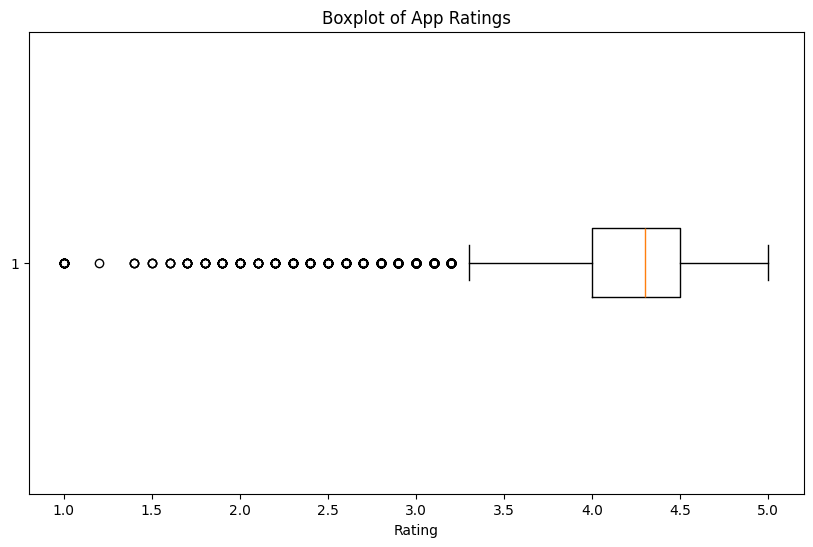

In [43]:
# Chart - 1 Boxplot of App Ratings

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
plt.boxplot(df_copy['Rating'], vert=False)
plt.title("Boxplot of App Ratings")
plt.xlabel("Rating")
plt.show()






##### 1. Why did you pick the specific chart?

A box plot is ideal for quickly identifying the spread of Ratings and detecting outliers.
Since Ratings are continuous, a box plot shows the median rating, variability, and unusual low-rating values in a single view.

##### 2. What is/are the insight(s) found from the chart?

* The median rating is very high (~4.3).
* 50% of ratings fall between 4.1 and 4.5.
* Several outliers on the left (1–3 rating range).
* Most apps have good to excellent ratings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive:
* Businesses launching new apps must maintain ratings above 4.0 to stay competitive.
* Outliers help teams identify apps that need urgent improvement.
* This tells us that high app quality is essential for success on the Google Play Store

Negative:
* The low-rating outliers indicate that a small number of apps are performing poorly.
These apps may face reduced visibility, fewer installs, and weaker user trust.

#### Chart - 2

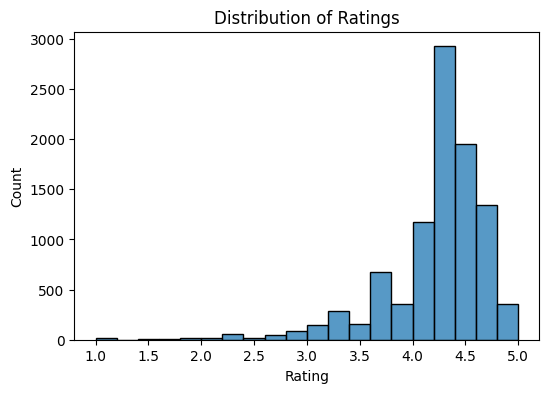

In [44]:
# Chart - 2 histogram of ratings
import seaborn as sns


plt.figure(figsize=(6,4))
sns.histplot(df_copy['Rating'], bins=20, kde=False)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.show()


##### 1. Why did you pick the specific chart?

A histogram is the best chart to understand how Ratings are distributed.

It shows how frequently each rating value appears, reveals concentration patterns, and clearly shows whether the distribution is skewed.

##### 2. What is/are the insight(s) found from the chart?

* The distribution is clearly left-skewed (negative skew).
* Most apps have high ratings between 4.0 and 4.7, while only a small number of apps fall below 3.0.
* This indicates that poorly rated apps are rare, and overall quality on the Play Store is consistently high.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: Helps define quality benchmark (>4.0).

Negative Insight: The small group of low-rated apps (below ~3.5) represents a risk zone.

#### Chart - 3

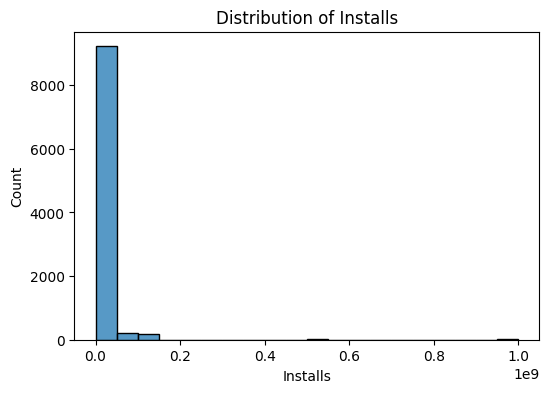

In [45]:
# Chart - 3 histogram of installs

plt.figure(figsize=(6,4))
sns.histplot(df_copy['Installs'], bins=20)
plt.title('Distribution of Installs')
plt.xlabel('Installs')
plt.show()


c:\Users\aravi\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


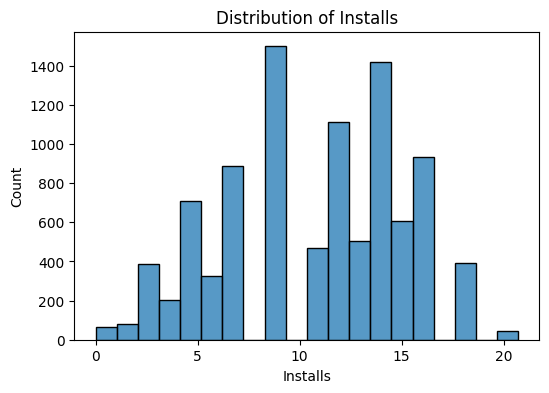

In [46]:
# we use log
import numpy as np
df_copy['Installs_log'] = np.log(df_copy['Installs'])

plt.figure(figsize=(6,4))
sns.histplot(df_copy['Installs_log'], bins=20)
plt.title('Distribution of Installs')
plt.xlabel('Installs')
plt.show()

##### 1. Why did you pick the specific chart?

* A histogram is ideal for visualizing how app installs are distributed.
* The raw Installs data is extremely right-skewed because a few apps have very high download counts.
* A histogram of the log-transformed values clearly shows patterns in install ranges that are not visible in the original scale.

##### 2. What is/are the insight(s) found from the chart?

* The distribution becomes much more normal-like after log transformation.
* Most apps fall in the mid-range log values (8 to 15) → roughly 3,000 to 3 million installs.
* Very low-install apps (log < 3 → < 20 installs) are extremely rare.
* Very high-install apps (log > 17 → 50M+ installs) are also rare.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive:
* Helps businesses set realistic install targets.
* Highlights where most apps lie, helping define growth strategy.

Negative:
* Most apps cluster in the mid-install zone → heavy competition.
* Many apps struggle to break into high-download categories.

#### Chart - 4

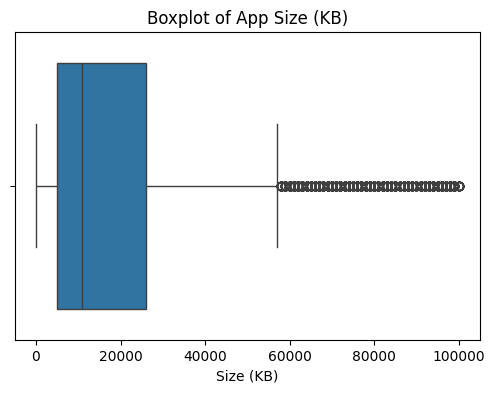

In [47]:
# Chart - 4 boxplot of app size


plt.figure(figsize=(6,4))
sns.boxplot(data=df_copy, x='Size')
plt.title('Boxplot of App Size (KB)')
plt.xlabel("Size (KB)")
plt.show()


##### 1. Why did you pick the specific chart?

A box plot is ideal for identifying the spread of app sizes and spotting extreme outliers quickly.
App Size has a wide range, and a box plot helps visualize median size, variability, and unusually large apps that fall outside the normal pattern.

##### 2. What is/are the insight(s) found from the chart?

* Most apps remain within a compact size range, while only a few are extremely large.
* There are multiple high-size outliers, meaning some apps are significantly larger than most others.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positives:
* Understanding size distribution helps teams optimize their app size.
* Smaller, optimized apps download faster and are preferred by users.
* Helps define size targets during development for better adoption.


Negative:
* Apps that fall into the large-size outlier zone may face lower downloads.
* Oversized apps can lose users to lighter alternatives.


#### Chart - 5

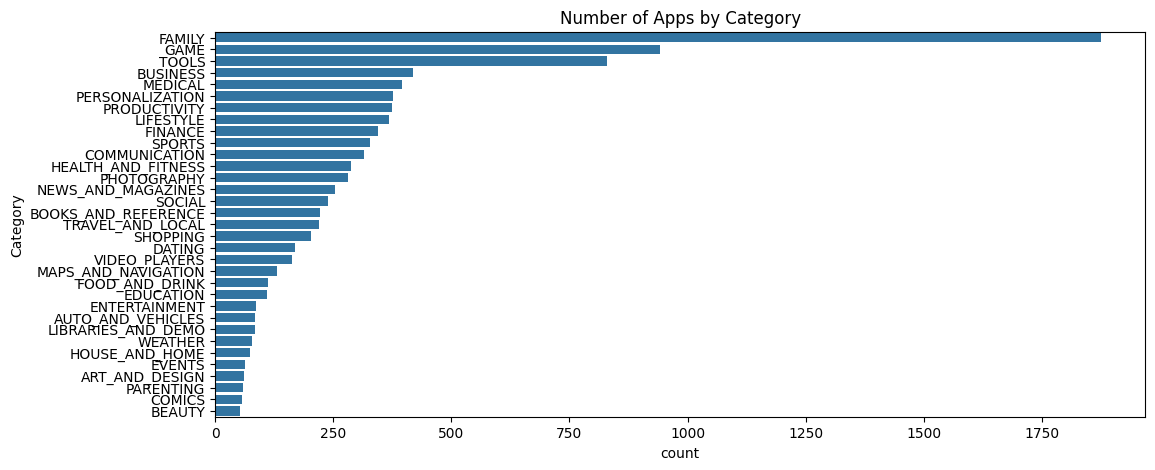

In [48]:
# Chart - 5 count plot of category
plt.figure(figsize=(12,5))
order = df_copy['Category'].value_counts().index
sns.countplot(data=df_copy, y='Category', order=order)
plt.title('Number of Apps by Category')
plt.show()

##### 1. Why did you pick the specific chart?

A countplot is the best chart for showing how many apps exist in each category.
It allows quick comparison of category popularity and highlights which segments dominate the Play Store.

##### 2. What is/are the insight(s) found from the chart?

* Some categories (Tools, Family, Game) have very high numbers of apps.
* Other categories (Events, Beauty, Comics) have very few apps.
* This shows that some segments are extremely crowded while others are underrepresented.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive:
* Categories with fewer apps (less crowded) offer better chances for visibility.
* Businesses can target under-served categories to stand out easily.
* Popular categories show high demand, meaning a well-designed app can attract a large user base.

Negative:
* Highly saturated categories, like Tools and Games, have extremely heavy competition.
* Categories with very few apps may have limited user interest, restricting growth potential.

#### Chart - 6

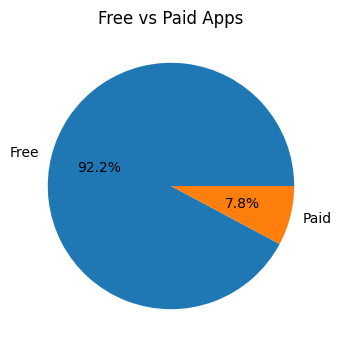

In [49]:
# Chart - 6 pie chart of type field

df_copy['Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6,4))
plt.title("Free vs Paid Apps")
plt.ylabel("")
plt.show()


##### 1. Why did you pick the specific chart?

A pie chart is effective for showing proportions between two categories.
Since Type has only Free and Paid, a pie chart clearly displays how much each group contributes to the total.

##### 2. What is/are the insight(s) found from the chart?

* Majority of apps are free.
* Paid apps are a small minority.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive:
* Launching a Free app increases the chance of higher installs.


Negative:
* Paid apps suffer from very low visibility in the store.
* Competing with free alternatives reduces install potential.

#### Chart - 7

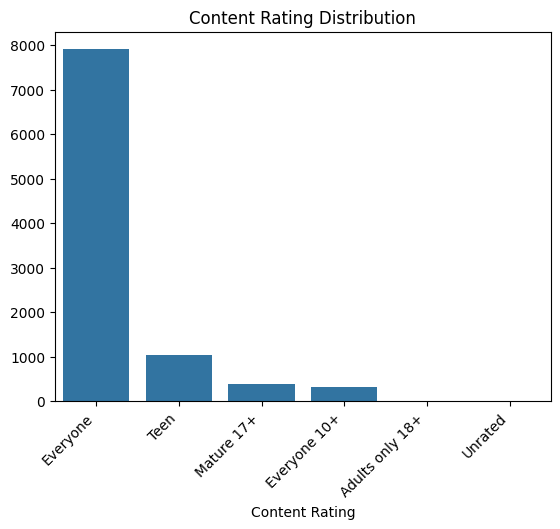

In [50]:
# Chart - 7 count plot of Content Rating

order = df_copy['Content Rating'].value_counts().index
sns.countplot(data= df_copy, x='Content Rating', order = order)
plt.title("Content Rating Distribution")
plt.xticks(rotation=45, ha='right')
plt.ylabel("")
plt.show()



##### 1. Why did you pick the specific chart?

A countplot clearly shows how many apps fall under each content rating category.

Sorting the bars using order makes it easy to see which ratings dominate and which ones are rare.

##### 2. What is/are the insight(s) found from the chart?

* Everyone rating has the highest number of apps (dominates).
* Teen and Mature 17+ categories are much smaller.
* Adults Only 18+ is extremely rare or almost zero.
* This shows that most apps are designed for general audiences rather than restricted age groups.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive:

* Targeting “Everyone” gives access to the largest audience.
* Easier to get more installs with general-content apps.

Negative:
* Teen/Mature apps reach smaller audiences.
* Restricted content may reduce visibility.

#### Chart - 8

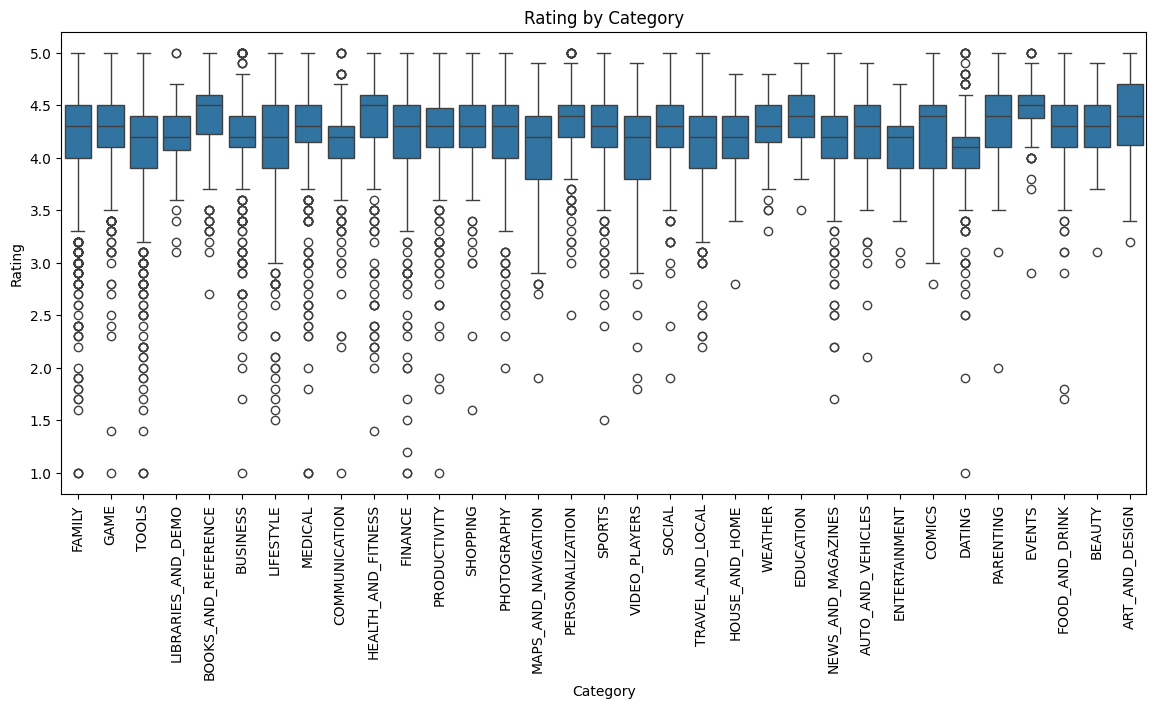

In [51]:
# Chart - 8 boxplot of category vs rating
plt.figure(figsize=(14,6))
sns.boxplot(data=df_copy, x='Category', y='Rating')
plt.xticks(rotation=90)
plt.title("Rating by Category")
plt.show()


##### 1. Why did you pick the specific chart?

A boxplot is ideal for comparing the distribution of Ratings across different categories.

It shows the median, spread, and outliers for each category, helping identify which categories consistently perform better or worse in terms of user satisfaction.

##### 2. What is/are the insight(s) found from the chart?

* Almost all categories have median ratings between 4.0 and 4.5.
* Some categories (like Education, Parenting, Books, Medical) appear more consistent with fewer extreme low scores.
* Wide spread in most categories indicates that user satisfaction varies significantly inside each category.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive:
* A high-rated category indicates strong user interest and satisfaction, meaning users actively engage with apps in this segment.

Negative:
* High-rated categories usually have intense competition, making it harder for new apps to stand out.
* Users compare new apps with existing high-rated apps, so even slight quality issues can result in lower ratings and slower adoption.


#### Chart - 9

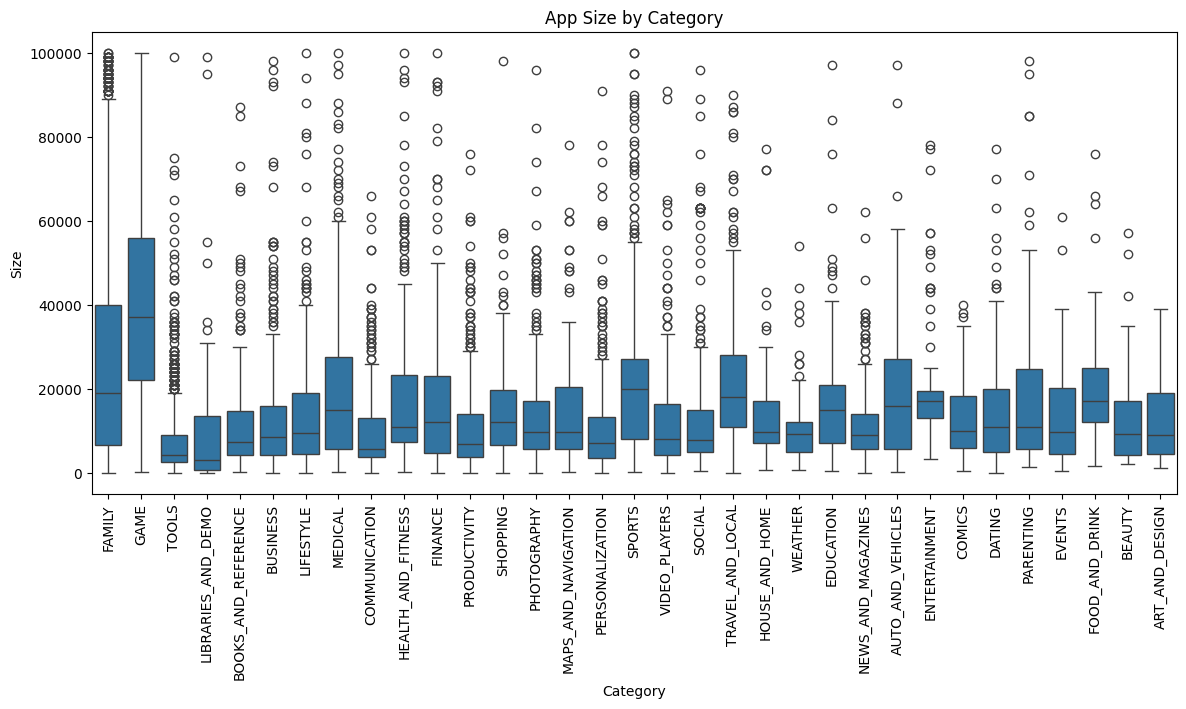

In [52]:
# Chart - 9 boxplot of category vs size
plt.figure(figsize=(14,6))
sns.boxplot(data=df_copy, x='Category', y='Size')
plt.xticks(rotation=90)
plt.title("App Size by Category")
plt.show()


##### 1. Why did you pick the specific chart?

To compare how app sizes differ across categories.
A boxplot clearly shows median size, variation, and outliers for each category, helping us understand which categories generally have heavier or lighter apps.

##### 2. What is/are the insight(s) found from the chart?

* FAMILY and GAME categories have the largest and most variable app sizes, indicating heavy apps with big resources.
* Tools, Libraries, Books, and Business categories have much smaller and more consistent sizes.
* Some categories like Photography, Travel, Communication, and Maps show many large outliers, meaning certain apps in those categories are extremely heavy.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive:

* Categories with smaller and consistent sizes (Tools, Books, Business) are easier for users to download, improving adoption.
* Understanding size expectations helps developers optimize app size for better performance.

Negative:

* Categories with very large sizes (Family, Games, Photography) may face lower install rates due to storage constraints.
* Heavy apps have higher risk of uninstalls and poor retention

#### Chart - 10

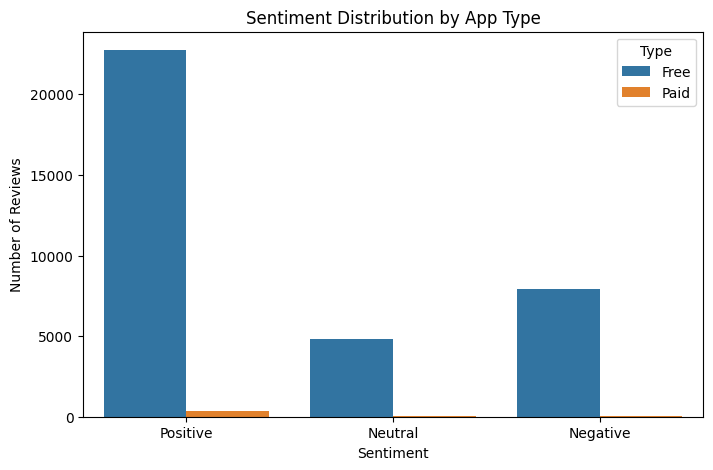

In [53]:
sentiment_type = pd.merge(
    df_copy[['App', 'Type']],
    reviews_df_copy[['App', 'Sentiment']],
    on='App',
    how='inner'
)

plt.figure(figsize=(8, 5))
sns.countplot(
    x='Sentiment',
    hue='Type',
    data=sentiment_type
)
plt.title("Sentiment Distribution by App Type")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()


##### 1. Why did you pick the specific chart?

To understand how user sentiment differs between Free and Paid apps, combining review sentiment and monetization type to analyze user engagement.

##### 2. What is/are the insight(s) found from the chart?

- Free apps have a much higher number of reviews overall.

- Positive sentiment dominates for both app types.

- Free apps also receive more negative reviews, likely due to a larger user base.

- Paid apps have fewer reviews, but relatively fewer negative sentiments.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive:

* High positive sentiment indicates strong user engagement.

* Paid apps show better sentiment balance, suggesting higher perceived quality.

* Helps developers choose the right monetization strategy based on user feedback.

Negative:

* Free apps attract more negative reviews due to ads or limitations.

* Large volume of negative sentiment can affect ratings and trust.

* Ignoring sentiment differences may lead to poor retention.

#### Chart - 11

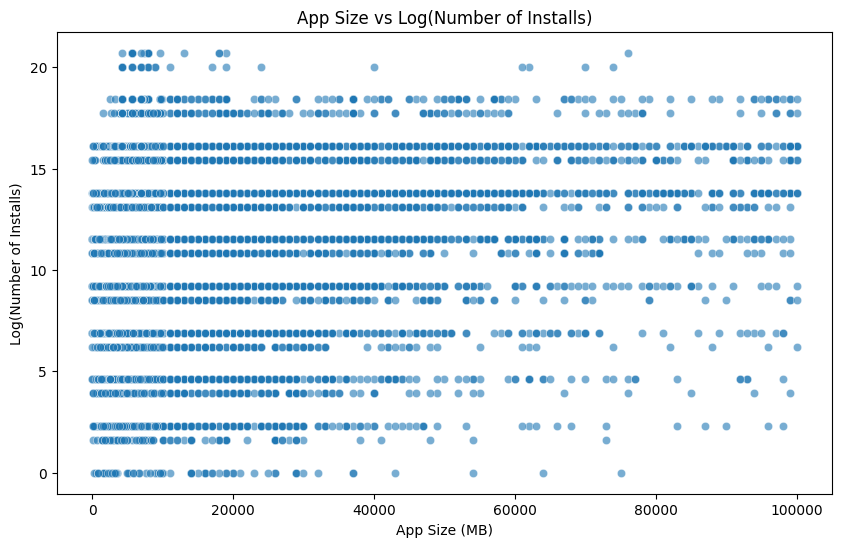

In [54]:
# Chart 11 – App Size vs Log(Number of Installs)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Size', y='Installs_log', data=df_copy, alpha=0.6)
plt.title("App Size vs Log(Number of Installs)")
plt.xlabel("App Size (MB)")
plt.ylabel("Log(Number of Installs)")
plt.show()


##### 1. Why did you pick the specific chart?

- This chart was selected to analyze whether app size, has any influence on app success, measured using log-transformed install counts.
- Since both variables are numerical and installs are highly skewed, a scatter plot with log(installs) is used.

##### 2. What is/are the insight(s) found from the chart?

- Apps with smaller and medium sizes are spread across all install levels, including very high installs.

- Large-sized apps do not show a consistent increase in log(installs).

- High install counts are not exclusive to large apps, many small apps also achieve very high installs.

- Overall, there is no strong positive correlation between app size and installs.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive:

* Smaller and medium-sized apps achieve high install counts, showing that lightweight apps scale effectively.

* Optimized app size improves download speed and device compatibility, increasing user adoption.

Negative:

* Larger app size does not guarantee higher installs, indicating diminishing returns.

* Very large apps face storage constraints and slower downloads, reducing adoption.

* Performance issues on low-end devices can lead to higher uninstall rates and lower long-term engagement.

#### Chart - 12

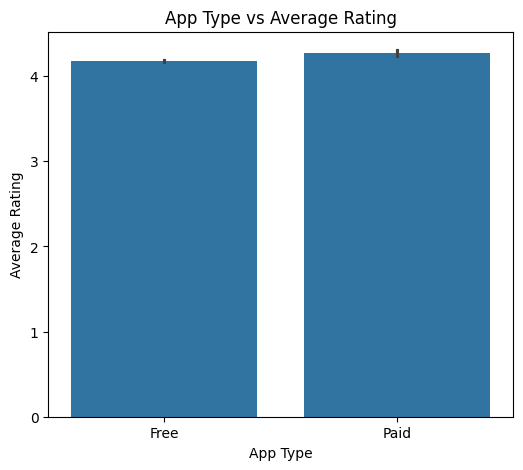

In [55]:
# Chart - 12 App Type vs Average Rating

plt.figure(figsize=(6, 5))
sns.barplot(x='Type', y='Rating', data=df_copy, estimator=np.mean)
plt.title("App Type vs Average Rating")
plt.xlabel("App Type")
plt.ylabel("Average Rating")
plt.show()


##### 1. Why did you pick the specific chart?

- To compare user satisfaction (average rating) across different app monetization types.

- A bar plot with mean aggregation clearly highlights quality perception differences between Free and Paid apps.

- Helps assess whether pricing strategy influences app engagement and success.

##### 2. What is/are the insight(s) found from the chart?

- Paid apps have a slightly higher average rating than free apps.

- Both Free and Paid apps maintain ratings above 4.0

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive:

* Users paying for apps tend to reward quality with higher ratings.

* Developers can justify premium pricing by focusing on stability, features, and user experience.

* Higher ratings improve trust, retention, and long-term engagement.

Negative:

* Paid apps may grow slower because users hesitate to pay before trying the app.

* Free apps can receive lower ratings due to ads or frequent interruptions.

* Poor user experience in free apps can lead to negative reviews, reducing trust and engagement.

#### Chart - 13

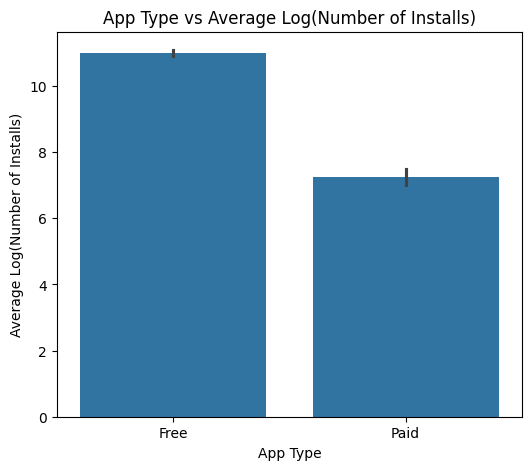

In [56]:
# Chart - 13 visualization code App Type vs Average Log(Number of Installs)

plt.figure(figsize=(6, 5))
sns.barplot(
    x='Type',
    y='Installs_log',
    data=df_copy,
    estimator=np.mean
)
plt.title("App Type vs Average Log(Number of Installs)")
plt.xlabel("App Type")
plt.ylabel("Average Log(Number of Installs)")
plt.show()


##### 1. Why did you pick the specific chart?

- To compare app success (installs) across different monetization types.

- Log transformation is used to handle the highly skewed install data.

- A bar plot makes it easy to compare average adoption levels between Free and Paid apps.

##### 2. What is/are the insight(s) found from the chart?

- Free apps have a much higher average log(installs) than paid apps.

- Paid apps receive significantly fewer installs, even after log scaling.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive:

* Free apps enable higher user adoption by removing the payment barrier.

* Higher installs improve visibility and ranking on the Play Store.

* Freemium or ad-based models support faster growth and engagement.

Negative:

* Paid apps grow slowly due to upfront cost.

* Fewer installs reduce visibility and reach.

* Relying only on paid models can limit long-term scaling.

#### Chart - 14

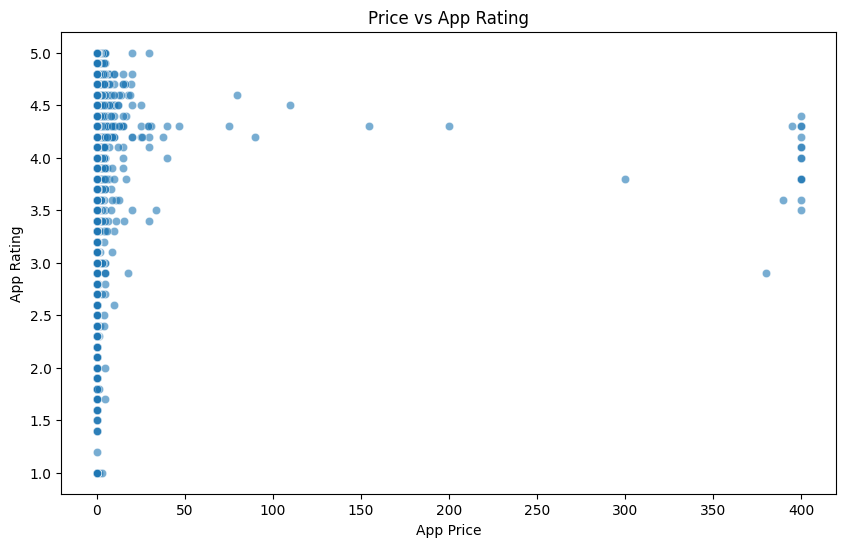

In [57]:
# Chart - 14 Price vs App Rating

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Rating', data=df_copy, alpha=0.6)
plt.title("Price vs App Rating")
plt.xlabel("App Price")
plt.ylabel("App Rating")
plt.show()


##### 1. Why did you pick the specific chart?

- To examine whether app price influences user satisfaction, measured through ratings.

- A scatter plot is suitable for analyzing the relationship between two numerical variables.

- Helps evaluate if higher-priced apps are perceived as better quality.

##### 2. What is/are the insight(s) found from the chart?

- Most apps are priced very low or free, yet still receive high ratings.

- There is no clear positive relationship between higher price and higher rating.

- Some high-priced apps receive only average ratings, while many low-priced apps receive excellent ratings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive:

* Developers can achieve high user satisfaction without charging high prices.

* Focus on quality and user experience is more important than pricing alone.

Negative:

* Overpriced apps may fail to meet user expectations, leading to lower ratings.

* Higher prices can reduce downloads and engagement.

* Users may switch to cheaper or free alternatives, limiting growth.

#### Chart - 15

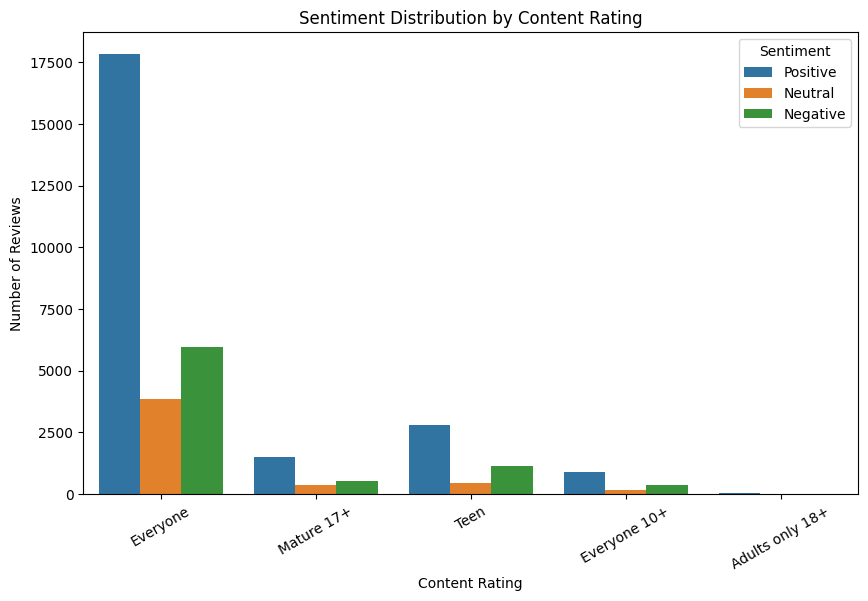

In [58]:
# Chart - 15 Sentiment Distribution by Content Rating

sentiment_content = pd.merge(
    df_copy[['App', 'Content Rating']],
    reviews_df_copy[['App', 'Sentiment']],
    on='App',
    how='inner'
)

plt.figure(figsize=(10, 6))
sns.countplot(
    x='Content Rating',
    hue='Sentiment',
    data=sentiment_content
)
plt.title("Sentiment Distribution by Content Rating")
plt.xlabel("Content Rating")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=30)
plt.show()




##### 1. Why did you pick the specific chart?

To compare how user sentiment (positive / neutral / negative) varies across different content ratings.

##### 2. What is/are the insight(s) found from the chart?

- Apps rated Everyone / Everyone 10+ receive mostly positive sentiment.

- Apps with restricted content ratings show relatively more neutral and negative sentiment.

- Broader-audience apps tend to have better user perception.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive:

* Targeting broader audiences improves user satisfaction and engagement.

* Helps developers align content strategy with user expectations.

* Positive sentiment supports better ratings and retention.

Negative:

* Restricted content limits audience size and feedback volume.

* Negative sentiment in niche categories can reduce trust and growth.

* Poor content targeting may lead to user dissatisfaction.

new added

#### Chart - 16

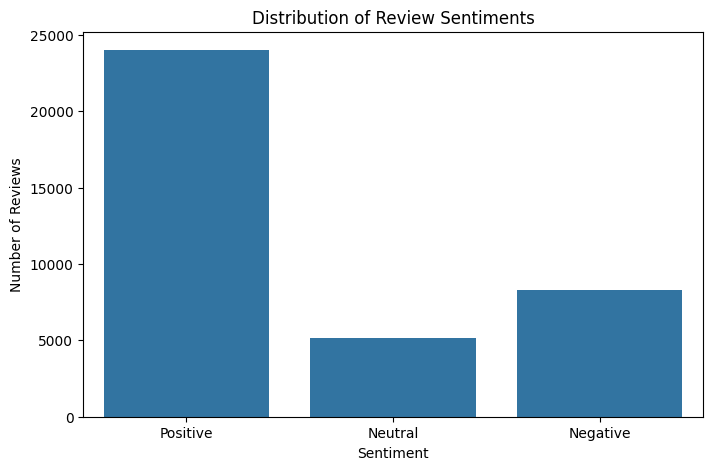

In [59]:
# Chart - 16 Distribution of Review Sentiments

plt.figure(figsize=(8, 5))
sns.countplot(x='Sentiment', data=reviews_df_copy)
plt.title("Distribution of Review Sentiments")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()




##### 1. Why did you pick the specific chart?

To understand the overall distribution of user sentiment in app reviews and get a high-level view of how users feel about apps on the Play Store.

##### 2. What is/are the insight(s) found from the chart?

- The majority of reviews are Positive.

- Negative reviews are present but fewer than positive ones.

- Neutral reviews form the smallest group.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive:

* High positive sentiment indicates good user satisfaction and engagement.

* Confirms that most apps are meeting user expectations.

* Positive sentiment supports better ratings, retention, and long-term success.

Negative:

* Presence of negative reviews shows existing user issues.

* Ignoring negative feedback can lead to rating drops over time.

* Accumulation of negative sentiment may harm brand trust and growth.

#### Chart - 17

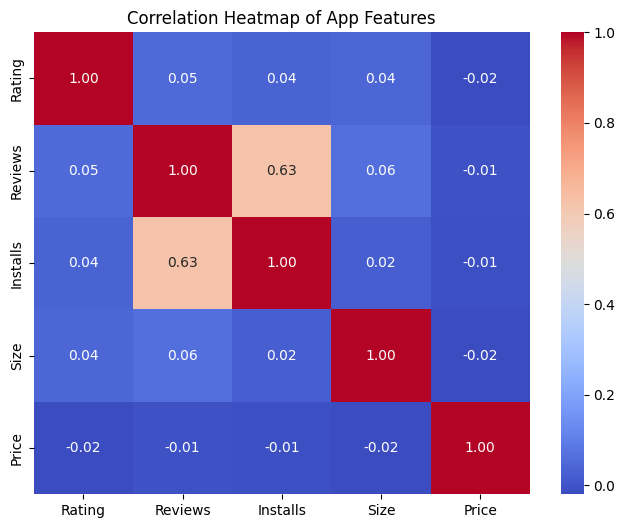

In [60]:
# Chart - 17 Correlation Heatmap of App Features

# Select relevant numerical columns
num_cols = ['Rating', 'Reviews', 'Installs', 'Size', 'Price']

# Compute correlation matrix
corr = df_copy[num_cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of App Features")
plt.show()


##### 1. Why did you pick the specific chart?

To understand how multiple app features relate to each other and identify which factors are most strongly associated with app engagement and success.

##### 2. What is/are the insight(s) found from the chart?

- Reviews and Installs show a strong positive relationship.

- Rating has a weak relationship with Installs.

- Price and Size have very little relationship with success metrics.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive:

* Increasing user engagement (reviews) can help improve installs.

* Helps focus efforts on features that actually influence growth.

Negative:

* Changing price or app size alone may not improve installs.

* Ignoring engagement factors can lead to poor growth.


#### Chart - 18

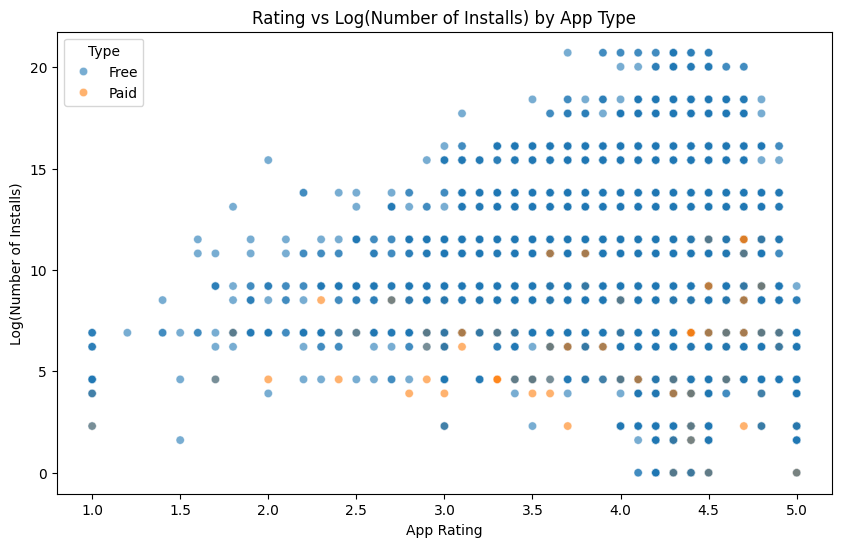

In [61]:
# Chart - 18 Rating vs Log(Number of Installs) by App Type

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Rating',
    y='Installs_log',
    hue='Type',
    data=df_copy,
    alpha=0.6
)
plt.title("Rating vs Log(Number of Installs) by App Type")
plt.xlabel("App Rating")
plt.ylabel("Log(Number of Installs)")
plt.show()


##### 1. Why did you pick the specific chart?

To analyze how app rating and installs together behave across different monetization types (Free vs Paid) and to understand whether app type influences success even at similar rating levels.

##### 2. What is/are the insight(s) found from the chart?

- Free apps achieve much higher installs across almost all rating levels.

- Paid apps remain clustered at lower install levels, even when ratings are high.

- Rating alone does not translate equally into installs for Free and Paid apps.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive:

* Free apps convert good ratings into higher reach and visibility.

* Freemium models help scale user adoption while maintaining quality.

Negative:

* Paid apps face a payment barrier, limiting installs despite good ratings.

* High-quality paid apps may still experience restricted growth and visibility.


#### Chart - 19

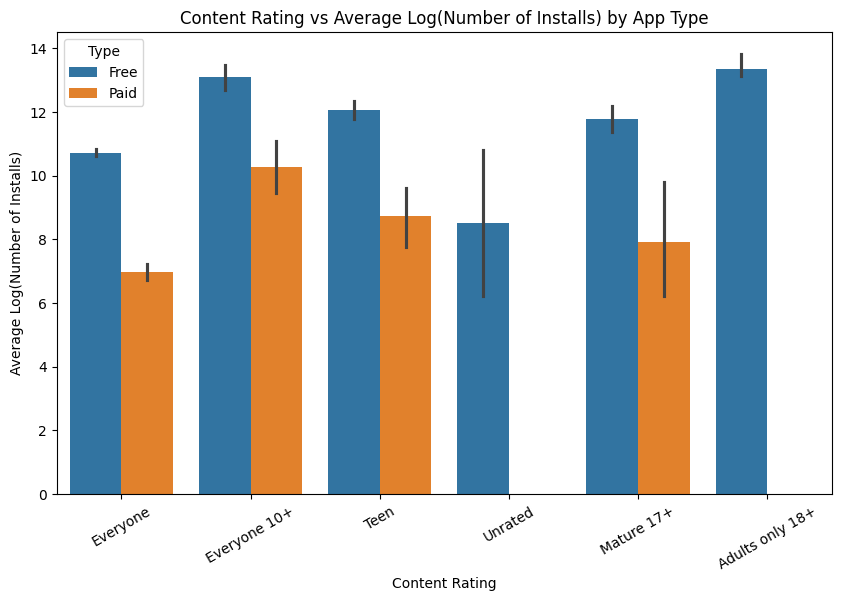

In [62]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Content Rating',
    y='Installs_log',
    hue='Type',
    data=df_copy,
    estimator='mean'
)
plt.title("Content Rating vs Average Log(Number of Installs) by App Type")
plt.xlabel("Content Rating")
plt.ylabel("Average Log(Number of Installs)")
plt.xticks(rotation=30)
plt.show()


##### 1. Why did you pick the specific chart?

To analyze how target audience (Content Rating) and monetization strategy (Free vs Paid) together influence app success, measured by installs.

##### 2. What is/are the insight(s) found from the chart?

- Free apps have higher average installs across all content ratings.

- Paid apps consistently receive lower installs even within the same content rating.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive:

* Targeting broader audiences increases reach and installs.

* Free or freemium apps scale better across all audience types.

* Helps developers choose the right combination of audience and monetization.


Negative:

* Paid apps face limited adoption regardless of content rating.

* Restricted content ratings reduce market size and scalability.

* Poor audience targeting can limit growth even for high-quality apps.

#### Chart - 20

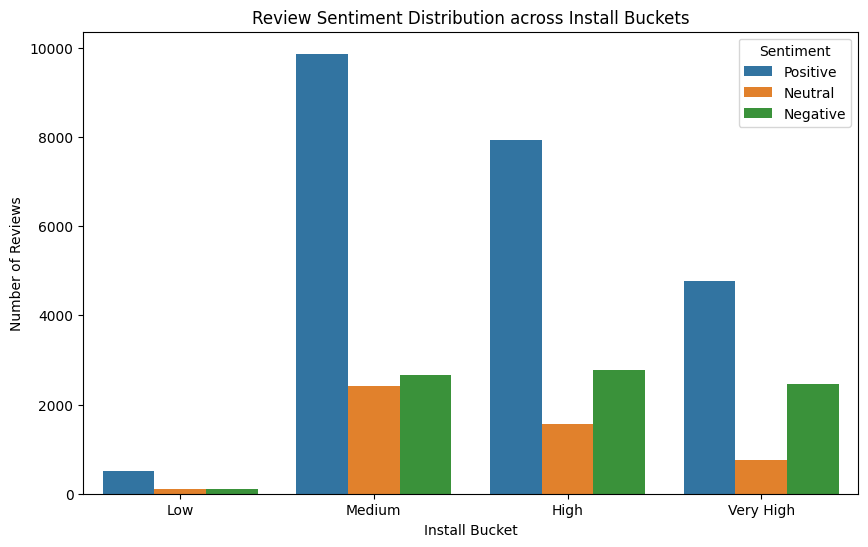

In [63]:
# Create install buckets (FIXED)
df_copy['install_bucket'] = pd.cut(
    df_copy['Installs'],
    bins=[0, 1e4, 1e6, 1e7, df_copy['Installs'].max()],
    labels=['Low', 'Medium', 'High', 'Very High'],
    include_lowest=True
)

# Merge with reviews (SAFE)
sentiment_installs = pd.merge(
    df_copy[['App', 'install_bucket']],
    reviews_df_copy[['App', 'Sentiment']],
    on='App',
    how='inner'
)

# Plot
plt.figure(figsize=(10, 6))
sns.countplot(
    x='install_bucket',
    hue='Sentiment',
    data=sentiment_installs
)
plt.title("Review Sentiment Distribution across Install Buckets")
plt.xlabel("Install Bucket")
plt.ylabel("Number of Reviews")
plt.show()


##### 1. Why did you pick the specific chart?

To analyze how user sentiment (reviews) varies across different levels of app success (install buckets) and understand the relationship between popularity and user perception.

##### 2. What is/are the insight(s) found from the chart?

- Positive reviews dominate across all install levels, especially in the Medium and High install buckets.


- Negative reviews are present across all buckets but are outnumbered by positive reviews in higher install categories.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive:

* Popular apps tend to maintain overall positive user sentiment, indicating strong engagement.

* Improving user experience helps apps move into higher install buckets.

* Positive sentiment supports scalability and long-term success.


Negative:

* Even high-install apps receive negative reviews, indicating continuous improvement is required.

* Apps in lower install buckets with negative sentiment may struggle to grow.

* Ignoring early negative feedback can slow future adoption.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Focus on App Quality to Maintain High Ratings

* Apps with higher ratings consistently achieve better installs and engagement.
* Prioritize bug fixes, performance improvements, and UX enhancements.
* Actively monitor ratings and respond to user feedback.


Optimize App Size

* Smaller and medium-sized apps perform better in terms of installs.
* Remove unnecessary assets and optimize media files.


Prefer Freemium over Paid-Only Models

* Free apps scale significantly better than paid apps.
* Use freemium or ad-based models to reduce entry barriers.
* Convert users later via in-app purchases or subscriptions.

Target Broader Audiences Where Possible

* Apps rated “Everyone” or “Everyone 10+” reach larger user bases.
* Avoid overly restrictive content ratings unless the app is niche by design.

Leverage User Reviews and Sentiment

* High-install apps still receive negative reviews—continuous improvement is critical.
* Track negative sentiment early and resolve common complaints.
* Encourage satisfied users to leave positive reviews.






# **Conclusion**

The analysis of Play Store app data and user review data shows that app success is driven primarily by user satisfaction and engagement. Apps with higher ratings, positive user sentiment, and a free or freemium model consistently achieve better install growth.

Technical factors such as optimized app size and clear content rating play an important role in improving accessibility and adoption. At the same time, user reviews reveal that even popular apps receive negative feedback, highlighting the need for continuous improvement and active response to user concerns.

Overall, apps that focus on quality, accessibility, and user feedback are more likely to achieve sustained engagement, higher installs, and long-term success in the competitive Play Store ecosystem.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***